# **Regression**

## Imports

In [21]:
import warnings

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier

import numpy as np


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('illinois-home-prices.csv')
df_standardized = df.copy()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Unstandardized Regression Models

In [3]:
features_matrix = df[['pct_college_education',
                      'unemployment_rate',
                      'median_household_income'
                      ]].values
target_array = df['average_home_price'].values

### Nonregularized Model

In [71]:
lr = LinearRegression()

cross_val = KFold(n_splits = 5,
                  shuffle = True,
                  random_state = 0
                  ) 
test_fold_r2 = cross_val_score(lr,
                               features_matrix,
                               target_array,
                               cv = cross_val,
                               scoring = "r2"
                               )

print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.70785285 0.8965539  0.88300917 0.56652437 0.53474723]
Test fold R^2 Mean: 0.7177375051069677
Test fold R^2 STD: 0.15214373697713193


### LASSO Model

,Lambda,Mean Test R^2
0,0,0.717738


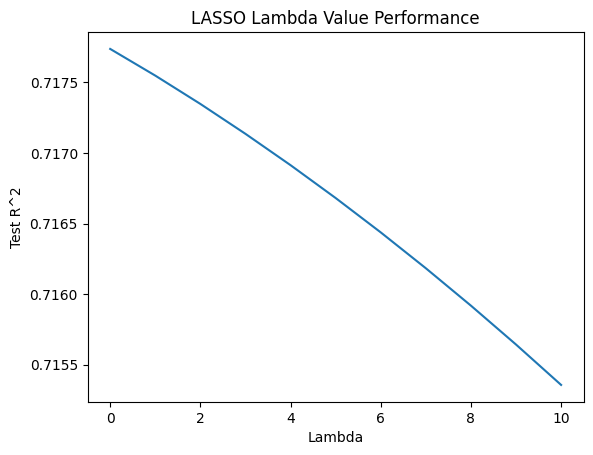

In [73]:
data = []

for i in np.arange(0, 11, 1):

    temp_model = Lasso(i,
                       max_iter = 1000
                       )
    cross_val = KFold(n_splits = 5,
                      shuffle = True,
                      random_state = 0
                      )
    test_fold_r2 = cross_val_score(temp_model,
                                   features_matrix,
                                   target_array,
                                   cv = cross_val,
                                   scoring = 'r2'
                                   )
    data.append([i,
                 test_fold_r2.mean()
                 ])
    
results_lasso = pd.DataFrame(data, columns = ['Lambda',
                                              'Mean Test R^2'
                                              ])

plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('LASSO Lambda Value Performance')

results_lasso.nlargest(1, 'Mean Test R^2')

### Ridge Model

,Lambda,Mean Test R^2
0,0,0.717738


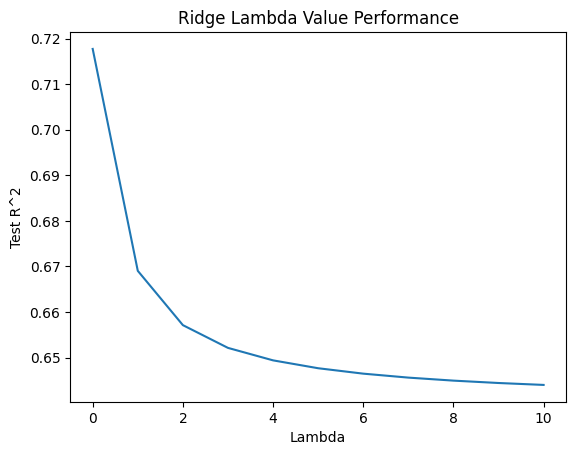

In [74]:
data = []

for i in np.arange(0, 11, 1):

    temp_model = Ridge(i,
                       max_iter = 1000
                       )
    cross_val = KFold(n_splits = 5,
                      shuffle = True,
                      random_state = 0
                      )
    test_fold_r2 = cross_val_score(temp_model,
                                   features_matrix,
                                   target_array,
                                   cv = cross_val,
                                   scoring = 'r2'
                                   )
    data.append([i,
                 test_fold_r2.mean()
                 ])
    
results_ridge = pd.DataFrame(data, columns = ['Lambda',
                                              'Mean Test R^2'
                                              ])

plt.plot(results_ridge['Lambda'].values, results_ridge['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('Ridge Lambda Value Performance')

results_ridge.nlargest(1, 'Mean Test R^2')

### Elastic Net Model

,L1 Ratio,Lambda,Mean Test R^2
10000,1.0,0,0.717738


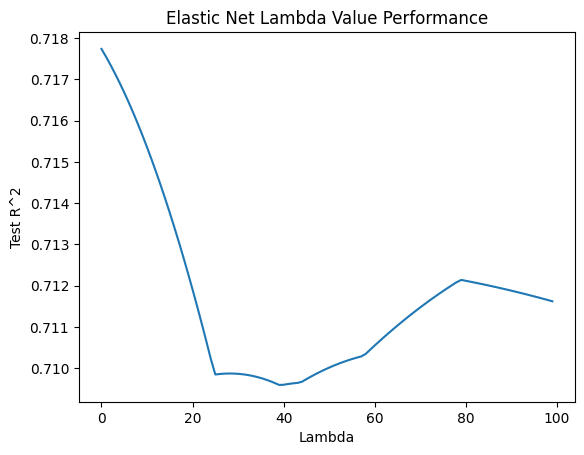

In [75]:
data = []

for l in np.arange(0, 1.01, 0.01):

    for i in np.arange(0, 100, 1):

        temp_model = ElasticNet(l1_ratio = l,
                                alpha = i,
                                max_iter = 1000
                                )
        cross_val = KFold(n_splits = 5,
                          shuffle = True,
                          random_state = 0
                          )
        test_fold_r2 = cross_val_score(temp_model,
                                       features_matrix,
                                       target_array,
                                       cv = cross_val,
                                       scoring = 'r2'
                                       )
        data.append([l,
                     i,
                     test_fold_r2.mean()
                     ])
    
results_en = pd.DataFrame(data, columns = ['L1 Ratio',
                                           'Lambda',
                                           'Mean Test R^2'
                                           ])

results_en_l1 = results_en[results_en['L1 Ratio'] == results_en['L1 Ratio'].max()]

plt.plot(results_en_l1['Lambda'].values, results_en_l1['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('Elastic Net Lambda Value Performance')

results_en_l1.nlargest(1, 'Mean Test R^2')

### Huber Regressor Model

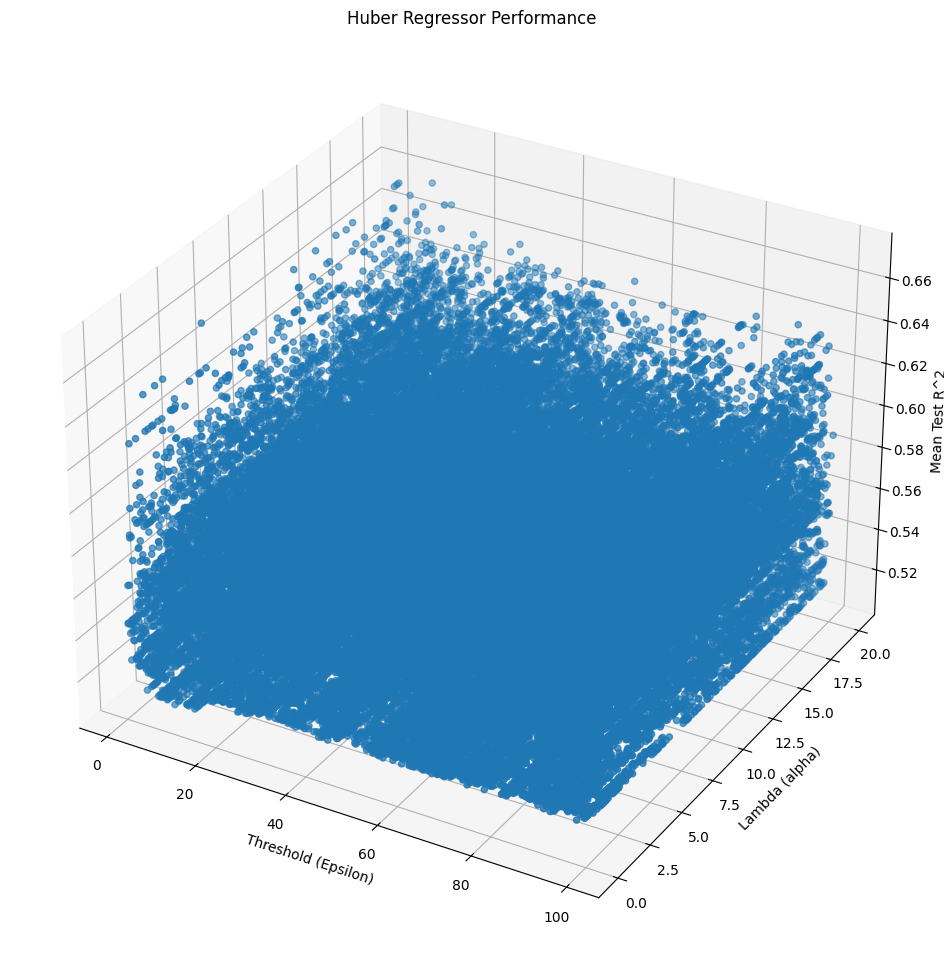

,Epsilon,Lambda,Mean Test R^2
45384,22.0,11.45,0.669132


In [49]:
data = []

for i in np.arange(0, 20, 0.05):

    for e in np.arange(1, 100, 0.5):
    
        temp_model = HuberRegressor(epsilon = e,
                                    alpha = i,
                                    max_iter = 1000
                                    )
        cross_val = KFold(n_splits = 5,
                          shuffle = True,
                          random_state = 0
                          )
        test_fold_r2 = cross_val_score(temp_model,
                                       features_matrix,
                                       target_array,
                                       cv = cross_val,
                                       scoring = 'r2'
                                       )
        data.append([e,
                     i,
                     test_fold_r2.mean()
                     ])
    
results_huber = pd.DataFrame(data, columns = ['Epsilon',
                                              'Lambda',
                                              'Mean Test R^2'
                                              ])

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(results_huber['Epsilon'], results_huber['Lambda'], results_huber['Mean Test R^2'])
ax.set_xlabel('Threshold (Epsilon)')
ax.set_ylabel('Lambda (alpha)')
ax.set_zlabel('Mean Test R^2')
ax.set_title('Huber Regressor Performance')
plt.show()

results_huber.nlargest(1,'Mean Test R^2')

### Unstandardized Model Ranking

1. **Nonregularized model | Mean Test R^2: 0.7177**

2. Nonregularized model with Huber Loss function | Mean Test R^2: 0.6691

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Standardization

Due to vast differences in features' variance and measurement, we will standardize our data. Both the unstandardized data and standardized data will be used in model construction. Standardized models will have easier to interpret results about the strength of the relationship between explanatory and response variables. Since `pct_college_education` and `median_household_income` are bimodal, the features will be standardized by quantile transformation. `unemployment_rate` will also be standardized by quantile transformation for consistency and due to the feature's moderate skewness and kurtosis, despite its unimodality.

In [77]:
qt = QuantileTransformer(n_quantiles = 100, output_distribution = 'normal', random_state = 0)
df_standardized['pct_college_education'] = qt.fit_transform(df_standardized[['pct_college_education']])
df_standardized['unemployment_rate'] = qt.fit_transform(df_standardized[['unemployment_rate']])
df_standardized['median_household_income'] = qt.fit_transform(df_standardized[['median_household_income']])

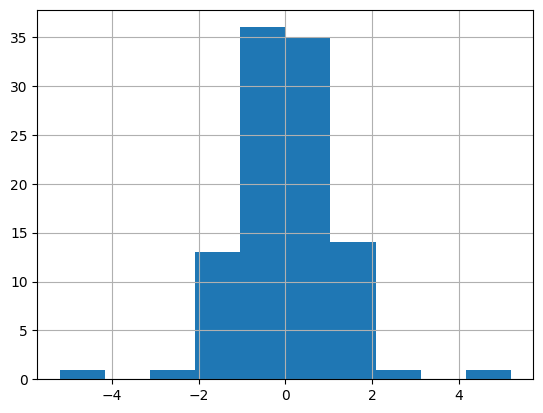

pct_college_education SD:  1.204003504413563


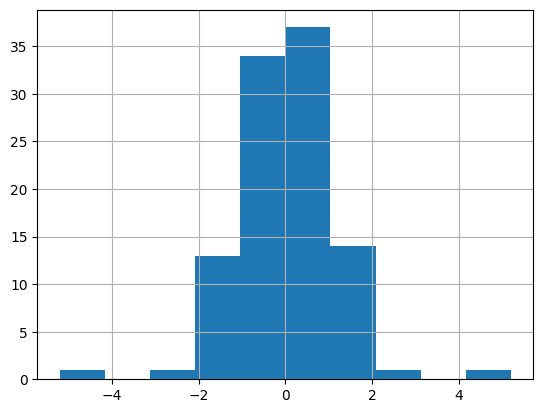

unemployment_rate SD:  1.2043111583976154


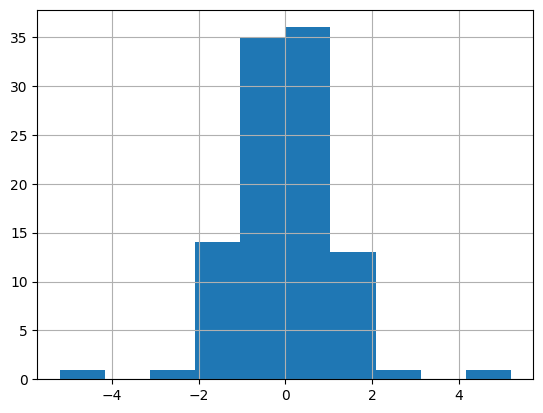

median_household_income SD:  1.2032791778677403


In [78]:
df_standardized['pct_college_education'].hist()
plt.show()
print('pct_college_education SD: ', df_standardized['pct_college_education'].std())

df_standardized['unemployment_rate'].hist()
plt.show()
print('unemployment_rate SD: ', df_standardized['unemployment_rate'].std())

df_standardized['median_household_income'].hist()
plt.show()
print('median_household_income SD: ', df_standardized['median_household_income'].std())

Seen above, every feature is now approximately normally distributed with standard deviations that are approximately the same.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Standardized Regression Models

In [79]:
features_matrix = df_standardized[['pct_college_education',
                      'unemployment_rate',
                      'median_household_income'
                      ]].values
target_array = df_standardized['average_home_price'].values

### Nonregularized Model

In [80]:
lr = LinearRegression()

cross_val = KFold(n_splits = 5,
                  shuffle = True,
                  random_state = 0
                  ) 
test_fold_r2 = cross_val_score(lr,
                               features_matrix,
                               target_array,
                               cv = cross_val,
                               scoring = "r2"
                               )

print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [ 0.25069837  0.73968875  0.68286892 -0.06607423  0.4044484 ]
Test fold R^2 Mean: 0.4023260434362891
Test fold R^2 STD: 0.2949278463191902


### LASSO Model

,Lambda,Mean Test R^2
79,0.395,0.402329


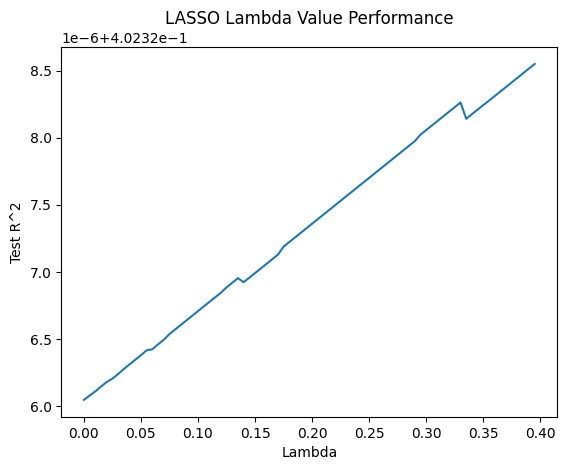

In [82]:
data = []

for i in np.arange(0, 0.4, 0.005):

    temp_model = Lasso(i,
                       max_iter = 1000
                       )
    cross_val = KFold(n_splits = 5,
                      shuffle = True,
                      random_state = 0
                      )
    test_fold_r2 = cross_val_score(temp_model,
                                   features_matrix,
                                   target_array,
                                   cv = cross_val,
                                   scoring = 'r2'
                                   )
    data.append([i,
                 test_fold_r2.mean()
                 ])
    
results_lasso = pd.DataFrame(data, columns = ['Lambda',
                                              'Mean Test R^2'
                                              ])

plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('LASSO Lambda Value Performance')

results_lasso.nlargest(1, 'Mean Test R^2')

### Ridge Model

,Lambda,Mean Test R^2
9,9,0.435298


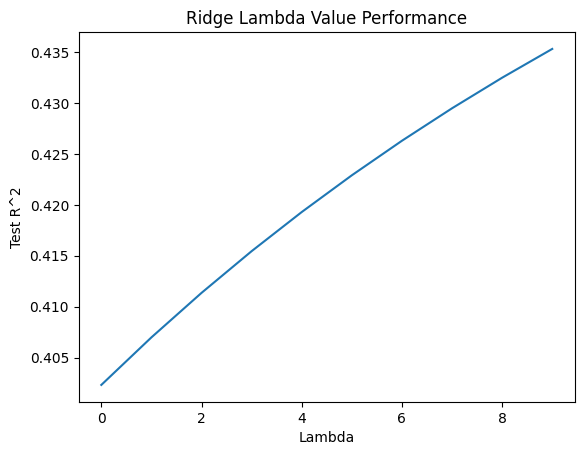

In [83]:
data = []

for i in np.arange(0, 10, 1):

    temp_model = Ridge(i,
                       max_iter = 1000
                       )
    cross_val = KFold(n_splits = 5,
                      shuffle = True,
                      random_state = 0
                      )
    test_fold_r2 = cross_val_score(temp_model,
                                   features_matrix,
                                   target_array,
                                   cv = cross_val,
                                   scoring = 'r2'
                                   )
    data.append([i,
                 test_fold_r2.mean()
                 ])
    
results_ridge = pd.DataFrame(data, columns = ['Lambda',
                                              'Mean Test R^2'
                                              ])

plt.plot(results_ridge['Lambda'].values, results_ridge['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('Ridge Lambda Value Performance')

results_ridge.nlargest(1, 'Mean Test R^2')

### Elastic Net Model

,L1 Ratio,Lambda,Mean Test R^2
403,1.0,0.15,0.402327


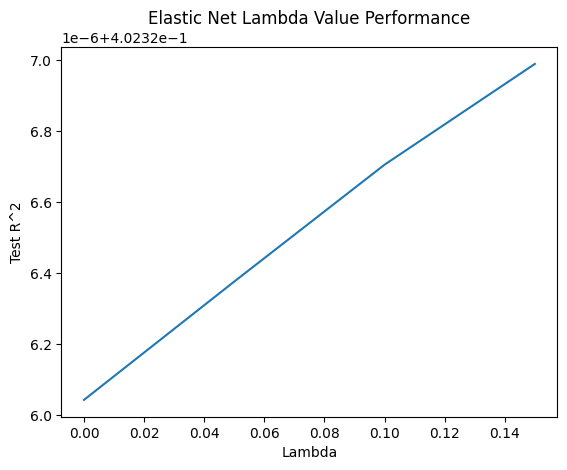

In [84]:
data = []

for l in np.arange(0, 1.01, 0.01):

    for i in np.arange(0, 0.2, 0.05):

        temp_model = ElasticNet(l1_ratio = l,
                                alpha = i,
                                max_iter = 1000
                                )
        cross_val = KFold(n_splits = 5,
                          shuffle = True,
                          random_state = 0
                          )
        test_fold_r2 = cross_val_score(temp_model,
                                       features_matrix,
                                       target_array,
                                       cv = cross_val,
                                       scoring = 'r2'
                                       )
        data.append([l,
                     i,
                     test_fold_r2.mean()
                     ])
    
results_en = pd.DataFrame(data, columns = ['L1 Ratio',
                                           'Lambda',
                                           'Mean Test R^2'
                                           ])

results_en_l1 = results_en[results_en['L1 Ratio'] == results_en['L1 Ratio'].max()]

plt.plot(results_en_l1['Lambda'].values, results_en_l1['Mean Test R^2'].values)
plt.xlabel('Lambda')
plt.ylabel('Test R^2')
plt.title('Elastic Net Lambda Value Performance')

results_en_l1.nlargest(1, 'Mean Test R^2')

### Huber Regressor Model

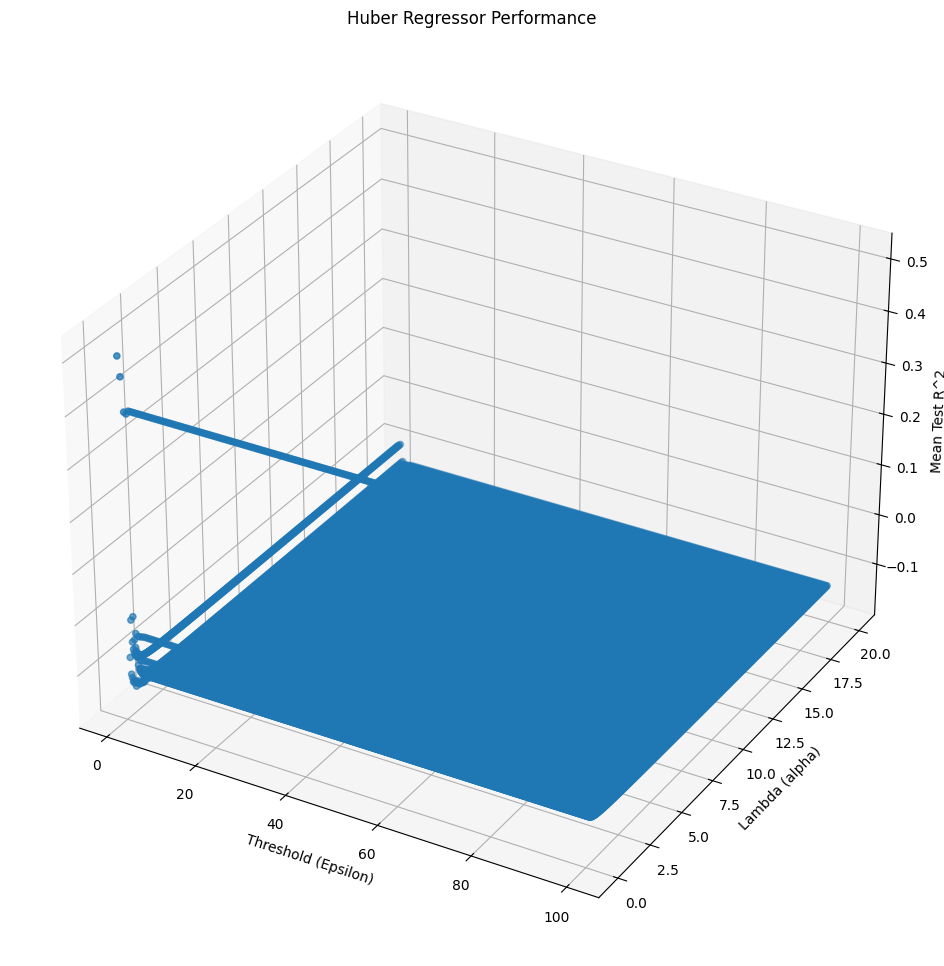

,Epsilon,Lambda,Mean Test R^2
0,1.0,0.0,0.50094


In [57]:
data = []

for i in np.arange(0, 20, 0.05):

    for e in np.arange(1, 100, 0.5):
    
        temp_model = HuberRegressor(epsilon = e,
                                    alpha = i,
                                    max_iter = 1000
                                    )
        cross_val = KFold(n_splits = 5,
                          shuffle = True,
                          random_state = 0
                          )
        test_fold_r2 = cross_val_score(temp_model,
                                       features_matrix,
                                       target_array,
                                       cv = cross_val,
                                       scoring = 'r2'
                                       )
        data.append([e,
                     i,
                     test_fold_r2.mean()
                     ])
    
results_huber = pd.DataFrame(data,columns = ['Epsilon',
                                              'Lambda',
                                              'Mean Test R^2'
                                              ])

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(results_huber['Epsilon'], results_huber['Lambda'], results_huber['Mean Test R^2'])
ax.set_xlabel('Threshold (Epsilon)')
ax.set_ylabel('Lambda (alpha)')
ax.set_zlabel('Mean Test R^2')
ax.set_title('Huber Regressor Performance')
plt.show()

results_huber.nlargest(1,'Mean Test R^2')

### Standardized Model Ranking

1. **Nonregularized model with Huber Loss function | Epsilon: 1, Mean Test R^2: 0.5009**

2. Regularized model with L2 penatly term (Ridge Regression) | Lambda: 9, Mean Test R^2: 0.4353

3. Regularized model with L1 penalty term (LASSO Regression) | Lambda: 0.395, Mean Test R^2: 0.4023

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Final Model**

In [88]:
features_matrix = df[['pct_college_education',
                      'unemployment_rate',
                      'median_household_income'
                      ]].values
target_array = df['average_home_price'].values

lr = LinearRegression()

cross_val = KFold(n_splits = 5,
                  shuffle = True,
                  random_state = 0
                  ) 
test_fold_r2 = cross_val_score(lr,
                               features_matrix,
                               target_array,
                               cv = cross_val,
                               scoring = "r2"
                               )

print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

lr.fit(features_matrix,
                       target_array
                       )

print('Coefficients: ',
      lr.coef_,
      '        Intercept: ',
      lr.intercept_
      )

Test fold R^2 Values: [0.70785285 0.8965539  0.88300917 0.56652437 0.53474723]
Test fold R^2 Mean: 0.7177375051069677
Test fold R^2 STD: 0.15214373697713193
Coefficients:  [1.77336348e+05 4.25527387e+05 3.11601636e+00]         Intercept:  -120148.98860574057


\begin{align*}
\text{Nonregularized, unstandardized model} \, | \, \text{Mean Test } R^2: 0.7177375051069677
\end{align*}

\begin{align*}
\widehat{average\_home\_price}= &- 120148.9886 \\
&+ 177336.348 \times pct\_college\_education \\
&+ 425527.387 \times unemployment\_rate \\
&+ 3.11601636 \times median\_household\_income \\
\end{align*}